<a href="https://colab.research.google.com/github/Dzy00/CHL5230-datathon2/blob/main/CHL5230_datathon2_Team6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dataset #1: Mortality Dataset for Cardiovascular Disease Complications

(299, 13)
Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')


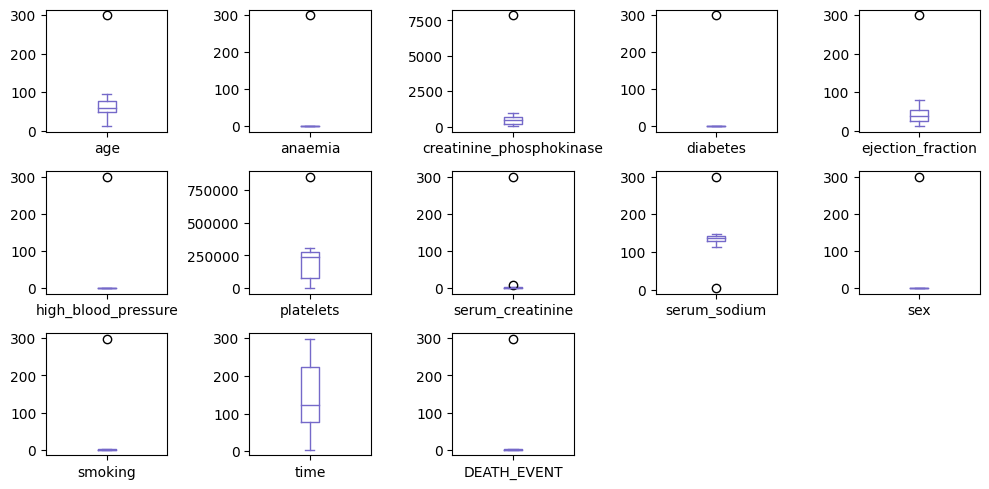

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64


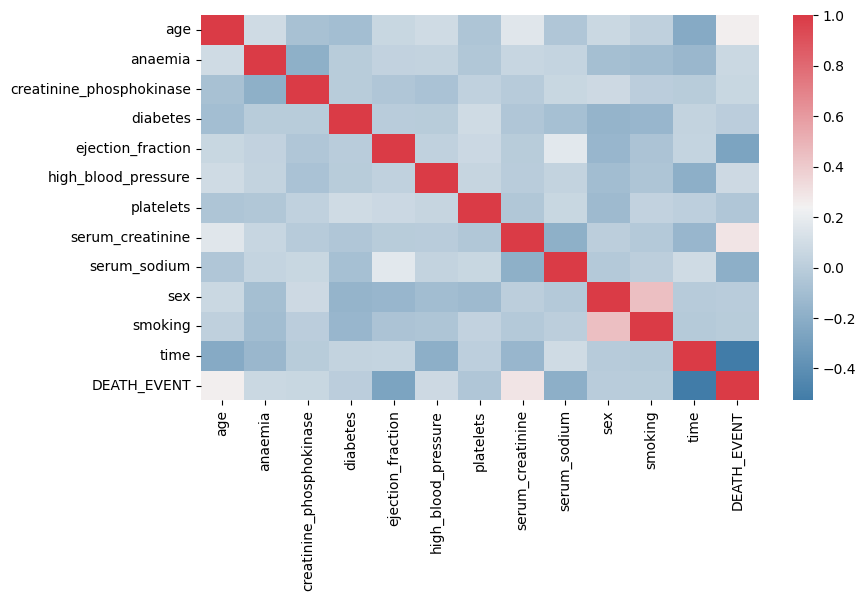

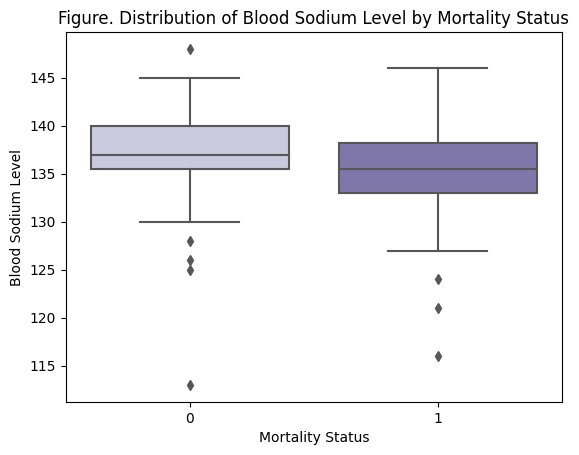

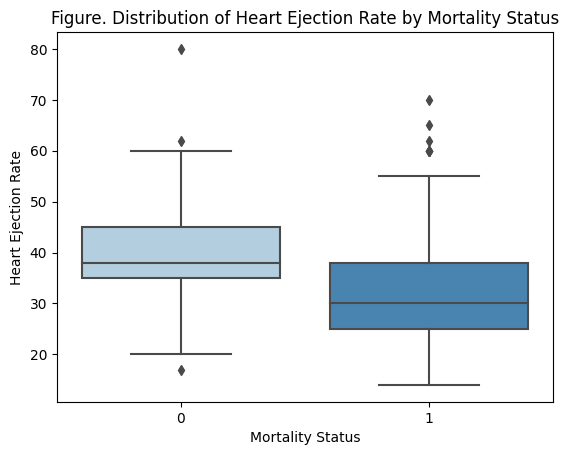

ImportError: ignored

In [7]:
# dataset 1: Mortality Dataset for Cardiovascular Disease Complications

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

# read dataset
mortal_df = pd.read_csv('Mortality Dataset.csv')
mortal_df.head()

# check dimension of the dataset
print(mortal_df.shape)

# list the columns of the dataframe
print(mortal_df.columns)

# summary statistics
description = mortal_df.describe()
description
description.plot(kind='box', subplots=True, layout=(3, 5), figsize=(10, 5), color='#7569c9')
plt.tight_layout()
plt.show()

# check missing value
# no NA
print(mortal_df.isnull().sum())

# visualize the data with histogram
plt.figure(figsize=(9,5))

# correlation matrix between variables
mortal_Mcorr = mortal_df.corr()
cmap = sns.diverging_palette(240, 10, as_cmap=True) # customerize cmap color
sns.heatmap(mortal_Mcorr, annot=False, cmap=cmap)
plt.show()

# Gender
sns.boxplot( x=mortal_df['DEATH_EVENT'], y=mortal_df['serum_sodium'], palette="Purples")
plt.title('Figure. Distribution of Blood Sodium Level by Mortality Status')
plt.xlabel('Mortality Status')
plt.ylabel('Blood Sodium Level')
plt.show()

# ejection fraction
sns.boxplot( x=mortal_df['DEATH_EVENT'], y=mortal_df['ejection_fraction'], palette="Blues")
plt.title('Figure. Distribution of Heart Ejection Rate by Mortality Status')
plt.xlabel('Mortality Status')
plt.ylabel('Heart Ejection Rate')
plt.show()

# servival analysis by gender
!pip install scikit-survival
from sksurv.nonparametric import kaplan_meier_estimator

# encode the 'DEATH_EVENT' to bool for survival analysis
mortal_df['DEATH_EVENT_bool'] = mortal_df['DEATH_EVENT'].map({0: False, 1: True})
mortal_df.head()

for sex in (0, 1):
    mask_treat = mortal_df["sex"] == sex
    time, survival_prob, conf_int = kaplan_meier_estimator(
        mortal_df["DEATH_EVENT_bool"][mask_treat],
        mortal_df["time"][mask_treat],
        conf_type="log-log",
    )

    plt.step(time, survival_prob, where="post", label=f"Sex = {sex}")
    plt.fill_between(time, conf_int[0], conf_int[1], alpha=0.25, step="post")

plt.ylim(0, 1)
plt.title('Figure. Survival Rate Over Time by Gender')
plt.ylabel("Probability of Survival")
plt.xlabel("Time")
plt.legend(loc="best")
plt.show()

Logistic regression for dataset 1 with outcome mortality status


Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.82      0.82        45
           1       0.47      0.47      0.47        15

    accuracy                           0.73        60
   macro avg       0.64      0.64      0.64        60
weighted avg       0.73      0.73      0.73        60



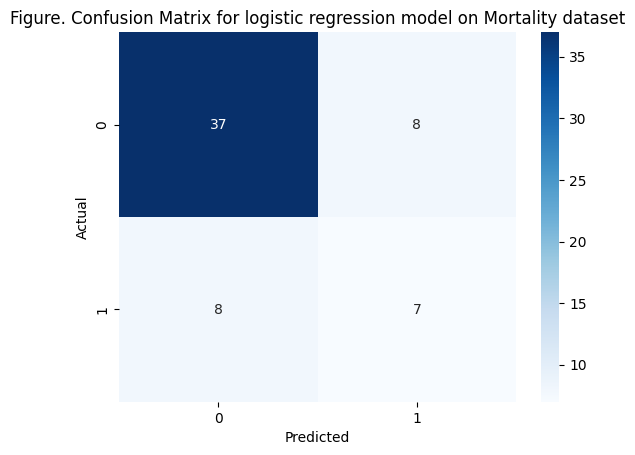

0.7333333333333333

In [8]:
########################################################## logistic regression
# for prediction
# features
# time and self created bool version of death_event are dropped
X = mortal_df[['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking']]
# outcome
y = mortal_df['DEATH_EVENT']

# split into 0.8 training and 0.2 testing datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=9)

# scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# logistic regression
log_reg = LogisticRegression(penalty='l2', C=1.0, solver='liblinear')
log_reg.fit(X_train, y_train)

# make prediction
y_pred = log_reg.predict(X_test)

# evaluate the model with confusion matrix
conf_matrix_logreg = confusion_matrix(y_test, y_pred)
class_report_logreg = classification_report(y_test, y_pred)

print("\nClassification Report:")
print(class_report_logreg)

sns.heatmap(conf_matrix_logreg, cmap='Blues', annot=True, fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Figure. Confusion Matrix for logistic regression model on Mortality dataset')
plt.show()

# overall correct classification rate
np.trace(conf_matrix_logreg)/np.sum(conf_matrix_logreg)

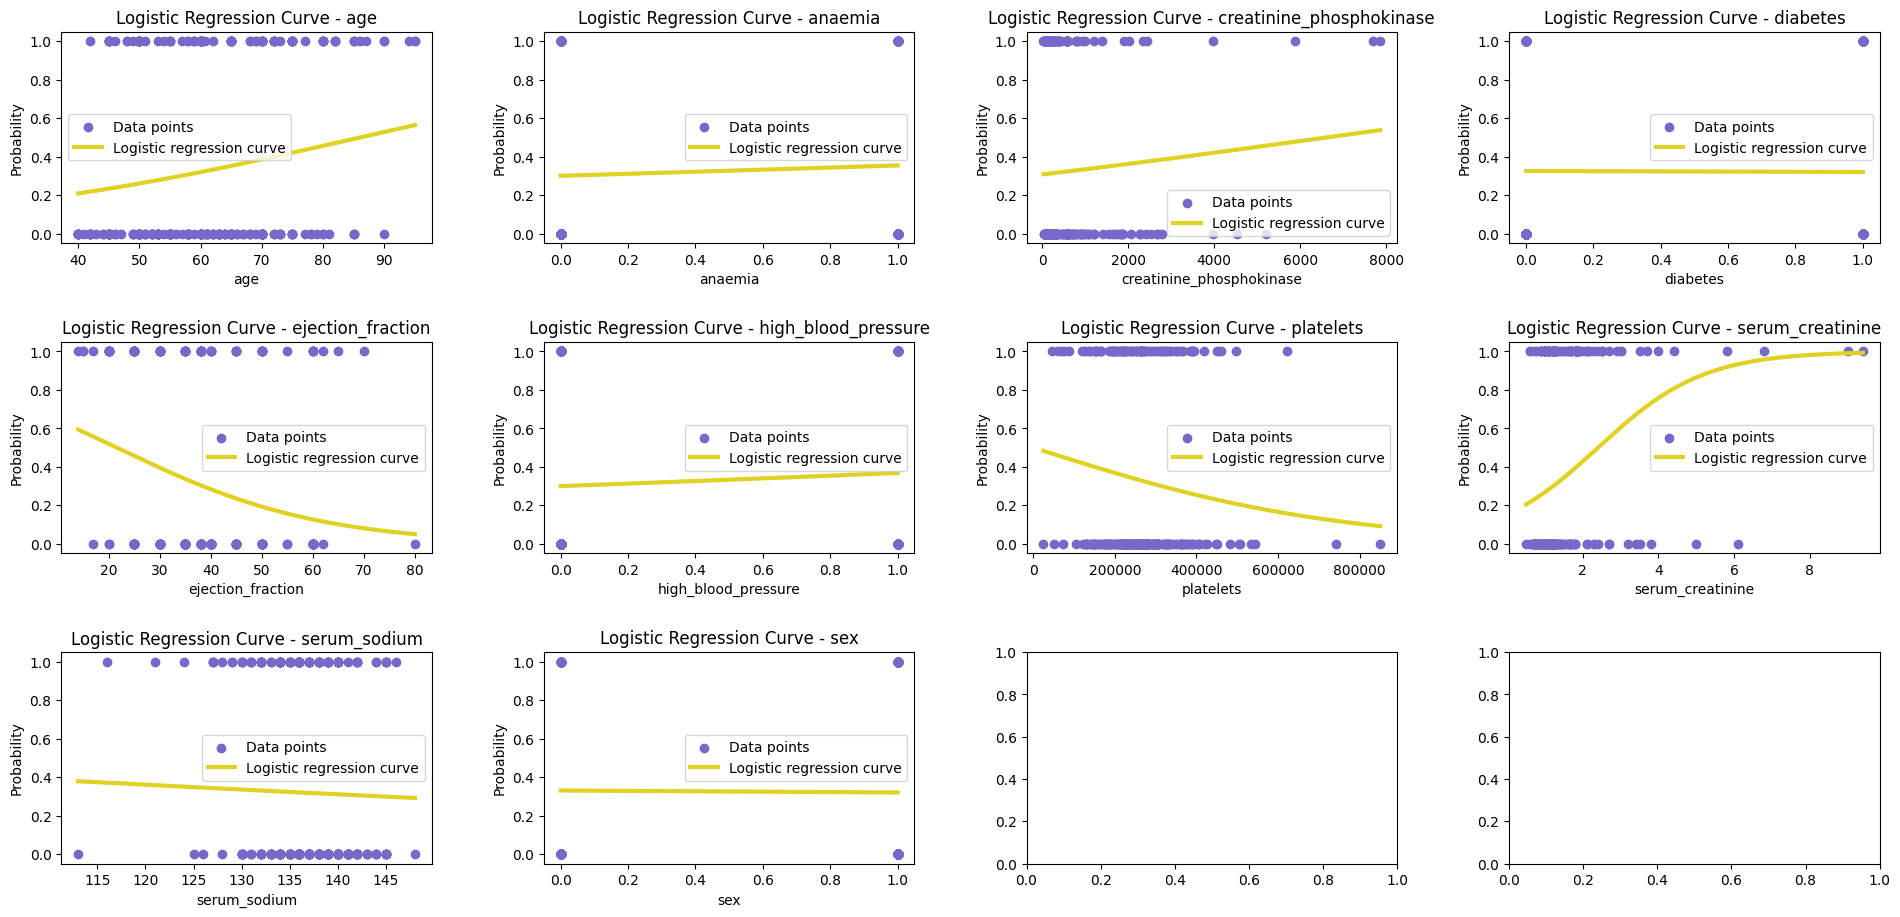

In [9]:
# explore the features
# there are 3 rows and 4 columns in the graph panel
fig, axs = plt.subplots(3, 4, figsize=(20, 10))
fig.tight_layout(pad=5.0)  # Adds padding between subplots

for i, feature in enumerate(mortal_df.columns[0:10]):  # loop features
    # Determine row index (i.e. first 4 feature are in the first row, next 4 in second row)
    row = row = i // 4
    col = i % 4  # Determine column index

    # Reshape the feature and outcome arrays to fit the model
    X = mortal_df[[feature]]
    y = mortal_df['DEATH_EVENT']

    # Fit logistic regression model
    log_reg.fit(X, y)

    # Get min and max values of the feature for plotting
    x_test = np.linspace(X.min(), X.max(), 300)

    # Get the probability for each value in the range
    prob = log_reg.predict_proba(x_test)[:, 1]

    # Plot the data points
    axs[row, col].scatter(X, y, color='#7569c9', label='Data points')

    # Plot the sigmoid curve
    axs[row, col].plot(x_test, prob, color='#e0d122', lw=3, label='Logistic regression curve' )

    axs[row, col].set_title(f'Logistic Regression Curve - {feature}')
    axs[row, col].set_xlabel(feature)
    axs[row, col].set_ylabel('Probability')
    axs[row, col].legend()

In [10]:
# logistic regression feature model summary
import statsmodels.api as sm
import pandas as pd

# Separate features and outcome variable
X = mortal_df[['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking']]
y = mortal_df['DEATH_EVENT']

# Add a constant term for the intercept
X = sm.add_constant(X)

# Create and fit logistic regression model
log_reg = sm.Logit(y, X).fit()

# Get summary report
summary = log_reg.summary()
print(summary)

Optimization terminated successfully.
         Current function value: 0.492108
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:            DEATH_EVENT   No. Observations:                  299
Model:                          Logit   Df Residuals:                      287
Method:                           MLE   Df Model:                           11
Date:                Sun, 01 Oct 2023   Pseudo R-squ.:                  0.2160
Time:                        19:45:15   Log-Likelihood:                -147.14
converged:                       True   LL-Null:                       -187.67
Covariance Type:            nonrobust   LLR p-value:                 9.169e-13
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                        4.9643      4.601      1.079      0.281      -4.054

In [ ]:
# survival analysis



---



# Dataset 2: Cardiovascular Event Dataset

In [11]:

# read dataset
cvd = pd.read_csv('Cardiovascular Event Dataset.csv')
# Checking for missing values
print(cvd.isnull().sum())
# Fill missing values with median
cvd.fillna(cvd.median(), inplace=True)

# number of observations after dropping NA
cvd.head()
print(len(cvd))

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64
5110


In [12]:
# Count the rows for each category
heart_disease_counts = cvd['heart_disease'].value_counts()

# Print the counts
print(heart_disease_counts)

0    4834
1     276
Name: heart_disease, dtype: int64


In [ ]:
# filtered data with heart disease = 1
filtered_data = cvd[cvd['heart_disease'] == 1]

# data visualizations for categorical variables
categorical_variables = ["gender", "hypertension", "ever_married", 'work_type','Residence_type', 'smoking_status', "stroke"]

for variable in categorical_variables:
    sns.catplot(hue=variable, y="heart_disease", data=filtered_data, kind="count",
    palette="pastel", edgecolor=".6",)

# Set labels and title
    plt.xlabel(variable)
    plt.ylabel("Heart Disease Status")
    plt.title(f"Heart Disease Status by {variable}")

# Show the plot
    plt.show()

In [ ]:
# mosiac plot
import matplotlib.pyplot as plt
from statsmodels.graphics.mosaicplot import mosaic
import pandas as pd
import seaborn as sns

# data visualizations for categorical variables
categorical_variables = ["gender", "hypertension", "ever_married", 'work_type','Residence_type', 'smoking_status', "stroke"]

# adjust the plots
fig, ax = plt.subplots(figsize=(12, 12))
for rect in ax.patches:
    width = rect.get_width()
    height = rect.get_height()
    x, y = rect.get_xy()
    ax.annotate(f'{height:.0f}', (x + width / 2, y + height / 2), ha='center', va='center', fontsize=10)  # Decrease fontsize

#create mosiac plots
for variable in categorical_variables:
    mosaic(cvd, [variable, 'heart_disease'])

# Set labels and title
    plt.xlabel(variable)
    plt.ylabel("Heart Disease Status")
    plt.title(f"Heart Disease Status by {variable}")

plt.show()

Findings:
1. Greater proporations in male having heart diseases
2. Patients who have hypertension tend to have heart diseases
3. Greater proporations in patients who are married and have heart diseases
4. Greater proportion in people who are self-employed to have heart diseases
5. no obvious differences bvetween rural and urban living stats
6. Greater proportions in patients who formerly smoked or currely smokes to have heart diseases
7. A greater propotion of heart diseases in people who previous has strokes
Next steps: include gender, hypertension, marriage status, work type, smoke status, and stroke

In [ ]:
# visualize age
sns.catplot(data=cvd, x="heart_disease", y="age",  kind= 'box')
# visualize avg glucose level
sns.catplot(data=cvd, x="heart_disease", y="avg_glucose_level",  kind= 'box')
# visualize bmi
sns.catplot(data=cvd, x="heart_disease", y="bmi",  kind= 'box')

Findings:
1. People who are older tend to have heart diseases
2. People who have hearts disease tend to have higher average glucose levels

Next steps:
1. In terms of predicting, age, avg glucose level, bmi might not be useful

In [ ]:
# Calculate the correlation matrix
correlation_matrix = cvd.corr()

# Create a correlation heatmap
plt.figure(figsize=(8, 6))  # Adjust the figure size as needed
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')

In [24]:
# Encoding 'gender' column
from sklearn.preprocessing import StandardScaler, LabelEncoder
le = LabelEncoder()
cvd['gender'] = le.fit_transform(cvd['gender'])  # Male: 1, Female: 0

# Encoding 'ever_married' column
le = LabelEncoder()
cvd['ever_married'] = le.fit_transform(cvd['ever_married'])

# Encoding 'work_type' column
le = LabelEncoder()
cvd['work_type'] = le.fit_transform(cvd['work_type'])

# Encoding 'Residence_type' column
le = LabelEncoder()
cvd['Residence_type'] = le.fit_transform(cvd['Residence_type'])

# Encoding 'Residence_type' column
le = LabelEncoder()
cvd['Residence_type'] = le.fit_transform(cvd['Residence_type'])

# Encoding 'smoking_status' column
le = LabelEncoder()
cvd['smoking_status'] = le.fit_transform(cvd['smoking_status'])


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,1,67.0,0,1,1,2,1,228.69,36.6,1,1
1,51676,0,61.0,0,0,1,3,0,202.21,28.1,2,1
2,31112,1,80.0,0,1,1,2,0,105.92,32.5,2,1
3,60182,0,49.0,0,0,1,2,1,171.23,34.4,3,1
4,1665,0,79.0,1,0,1,3,0,174.12,24.0,2,1



Classification Report:
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       971
           1       0.00      0.00      0.00        51

    accuracy                           0.95      1022
   macro avg       0.47      0.50      0.49      1022
weighted avg       0.90      0.95      0.92      1022



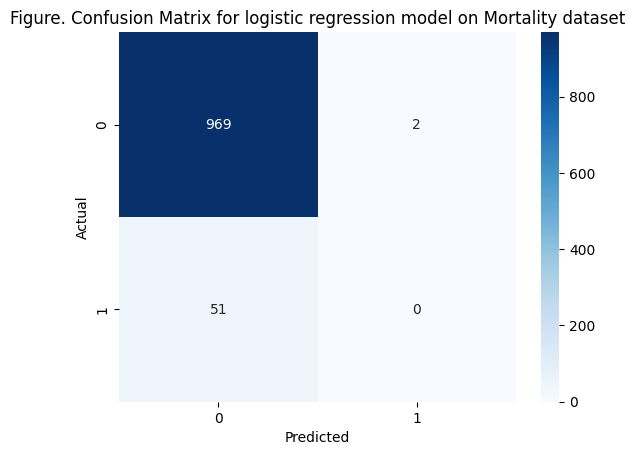

0.9481409001956947

In [26]:
# logistic regression for prediction
# features
X = cvd[['age', 'gender', 'hypertension', 'ever_married',
       'work_type', 'Residence_type', 'smoking_status',
       'stroke', 'avg_glucose_level', 'bmi']]
# outcome
y = cvd['heart_disease']

# split into 0.8 training and 0.2 testing datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=9)

# scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# logistic regression
log_reg = LogisticRegression(penalty='l2', C=1.0, solver='liblinear')
log_reg.fit(X_train, y_train)

# make prediction
y_pred = log_reg.predict(X_test)

# evaluate the model with confusion matrix
conf_matrix_logreg = confusion_matrix(y_test, y_pred)
class_report_logreg = classification_report(y_test, y_pred)

print("\nClassification Report:")
print(class_report_logreg)

sns.heatmap(conf_matrix_logreg, cmap='Blues', annot=True, fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Figure. Confusion Matrix for logistic regression model on Mortality dataset')
plt.show()

# overall correct classification rate
np.trace(conf_matrix_logreg)/np.sum(conf_matrix_logreg)

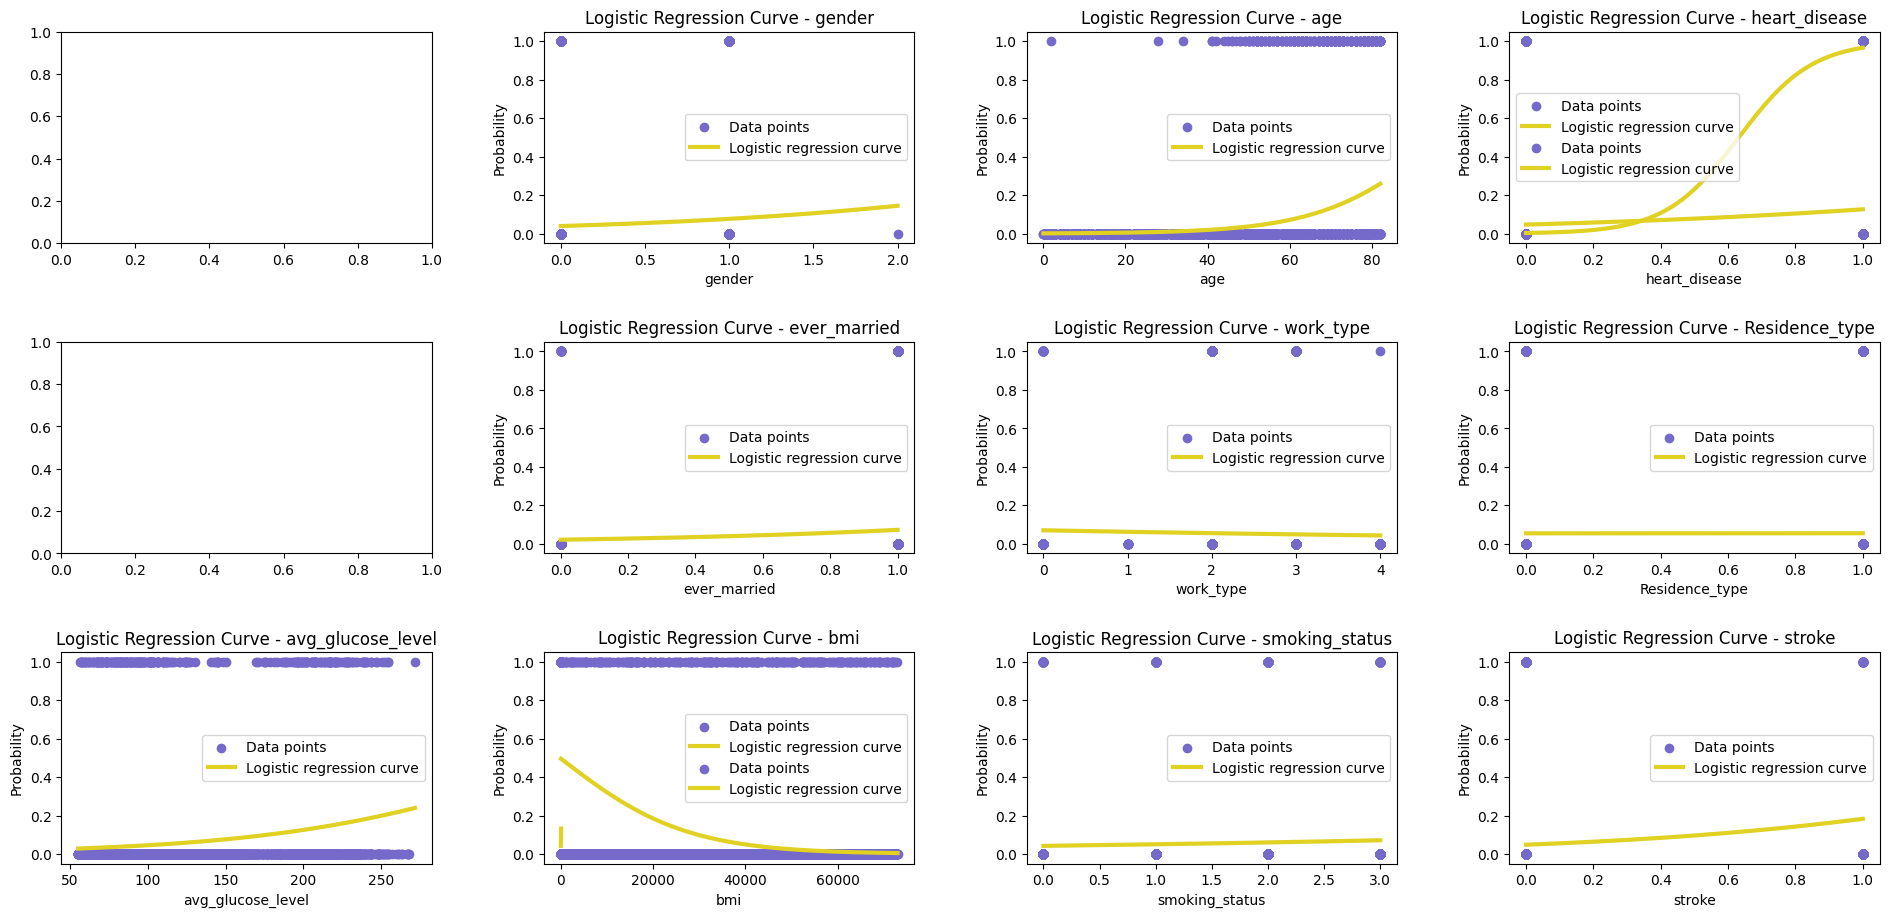

In [28]:
# logistic regression - feature exploration
# explore the features
# there are 3 rows and 4 columns in the graph panel
fig, axs = plt.subplots(3, 4, figsize=(20, 10))
fig.tight_layout(pad=5.0)  # Adds padding between subplots

columns_to_exclude = ['id', 'heart_disease']

for i, feature in enumerate(cvd.columns[:]):  # loop features
    if feature not in columns_to_exclude:
    # Determine row index (i.e. first 4 feature are in the first row, next 4 in second row)
      row = row = i // 4
      col = i % 4  # Determine column index

    # Reshape the feature and outcome arrays to fit the model
    X = cvd[[feature]]
    y = cvd['heart_disease']

    # Fit logistic regression model
    log_reg.fit(X, y)

    # Get min and max values of the feature for plotting
    x_test = np.linspace(X.min(), X.max(), 300)

    # Get the probability for each value in the range
    prob = log_reg.predict_proba(x_test)[:, 1]

    # Plot the data points
    axs[row, col].scatter(X, y, color='#7569c9', label='Data points')

    # Plot the sigmoid curve
    axs[row, col].plot(x_test, prob, color='#e0d122', lw=3, label='Logistic regression curve' )

    axs[row, col].set_title(f'Logistic Regression Curve - {feature}')
    axs[row, col].set_xlabel(feature)
    axs[row, col].set_ylabel('Probability')
    axs[row, col].legend()

In [29]:
# logistic regression - model
# logistic regression feature model summary
import statsmodels.api as sm
import pandas as pd

X = cvd[['age', 'gender', 'hypertension', 'ever_married',
       'work_type', 'Residence_type', 'smoking_status',
       'stroke', 'avg_glucose_level', 'bmi']]
# outcome
y = cvd['heart_disease']

# Add a constant term for the intercept
X = sm.add_constant(X)

# Create and fit logistic regression model
log_reg = sm.Logit(y, X).fit()

# Get summary report
summary = log_reg.summary()
print(summary)

Optimization terminated successfully.
         Current function value: 0.159737
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:          heart_disease   No. Observations:                 5110
Model:                          Logit   Df Residuals:                     5099
Method:                           MLE   Df Model:                           10
Date:                Sun, 01 Oct 2023   Pseudo R-squ.:                  0.2399
Time:                        20:02:02   Log-Likelihood:                -816.26
converged:                       True   LL-Null:                       -1073.9
Covariance Type:            nonrobust   LLR p-value:                2.322e-104
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -8.2811      0.564    -14.695      0.000      -9.386      -7.177
age     